In [4]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(14,7)})

In [5]:
df = pd.read_excel("Case Prediction Data2.xlsx")

In [6]:
df_comp = df[df["Product"] == "Provision"]
df_comp.head()

,Case Number,Subject,Date Created,Date Closed,Origin,Priority,Team,Case Type,SLA,Problem Statement,Product,Product Area,Product Category,Product Type,Jurisdiction,Resolution,KB #,KB Title
1,204979,Oregon STAT help: Previous Case 203787 Client ...,2017-01-02 09:03:00,2017-01-04 16:56:00,Web,High,Tax Preparation,Question / How To,Silver,Oregon STAT help: Previous Case 203787 Client ...,Provision,State,NaN,NaN,US.OR,Customer no longer needs assistance,NaN,NaN
15,205014,Deferred Scheduler Update,2017-01-03 09:24:00,2017-01-03 13:02:00,Web,Medium,Tax Preparation,Question / How To,Silver,I need to update deferred scheduler with new r...,Provision,Federal,NaN,NaN,NaN,Answer exists KB,041230710040368,NaN
79,205162,Unable to access download for Corptax 2016.2,2017-01-03 16:16:00,2017-01-03 17:08:00,Web,Medium,Tax Preparation,Problem / Error,Silver,logon website to get download for CorpTax 2016...,Provision,Federal,NaN,NaN,US.TX,Answer exists KB,161216104028927,Connections Error - Uh Oh something went wron...
80,205164,YE Provision CorpTax Rollforward Issue,2017-01-03 16:25:00,2017-01-03 18:40:00,Web,Medium,Tax Preparation,Question / How To,Silver,Need assistance tying out Return to Provision ...,Provision,Federal,NaN,NaN,NaN,Provide solution - no KB required (e.g. client...,NaN,NaN
85,205179,Do the email and text notifications in the wor...,2017-01-03 17:59:00,2017-01-11 18:31:00,Web,High,Tax Preparation,Question / How To,Silver,Would like to know if email functionality is a...,Provision,Configuration / Setup,NaN,NaN,NaN,Need more information,041526610345686,Can email notifications be sent for Tasks in W...


In [7]:
#dfc = df[df.Product == "Compliance"]
df_comp['Date Created'] = df_comp['Date Created'].dt.date
df_comp['Date Closed'] = df_comp['Date Closed'].dt.date
df_comp['Date'] = pd.to_datetime(df_comp['Date Created'], errors='coerce')
dfc = df_comp

In [8]:
# Adding a new column which will have the number of tickets per day
newdf = dfc[["Date","Case Number"]]
newdf.drop_duplicates(inplace=True)
newdf['Date'] = pd.to_datetime(newdf['Date'])
newdf = pd.DataFrame(newdf.groupby([newdf["Date"].dt.date]).count()["Case Number"])
newdf = newdf.reset_index()
newdf.index = newdf.Date
newdf['Date'] = pd.to_datetime(newdf['Date'], errors='coerce')
newdf = newdf.asfreq('D')
newdf = newdf.groupby(pd.Grouper(freq="M")).sum()
newdf

,Case Number
Date,
2017-01-31,276.0
2017-02-28,175.0
2017-03-31,204.0
2017-04-30,175.0
2017-05-31,142.0
...,...
2022-04-30,105.0
2022-05-31,96.0
2022-06-30,134.0


In [9]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68 entries, 2017-01-31 to 2022-08-31
Freq: M
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Case Number  68 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [10]:
f = Forecaster(y=newdf['Case Number'],current_dates=newdf.index)
f

Forecaster(
    DateStartActuals=2017-01-31T00:00:00.000000000
    DateEndActuals=2022-08-31T00:00:00.000000000
    Freq=M
    N_actuals=68
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

In [11]:
f.generate_future_dates(12)
f.set_test_length(.2)
f.set_estimator('arima')
f.manual_forecast(call_me='arima1')

# Auto-ARIMA Approach

In [12]:
auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=4, 
    max_D=4,
    max_Q=4,
    max_d=4,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=629.146, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=579.873, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=627.241, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=616.511, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=596.404, Time=0.19 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=588.964, Time=0.06 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=580.900, Time=0.14 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.29 sec

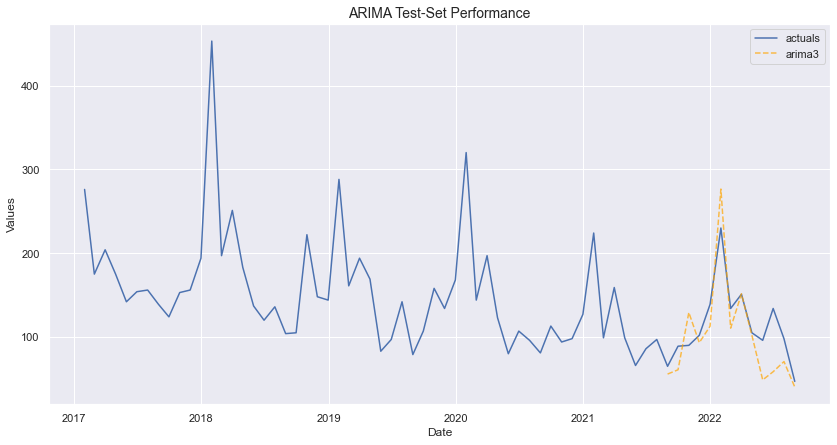

In [13]:
f.plot_test_set(ci=False,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

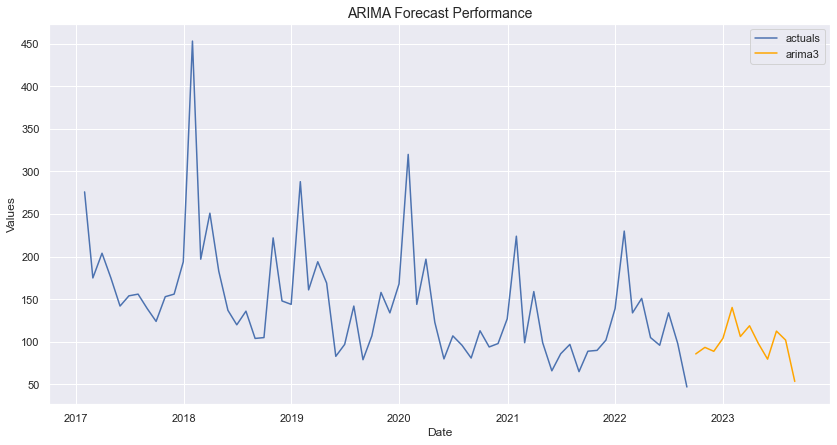

In [14]:
f.plot(ci=False,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [15]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [16]:
results["test_set_predictions"]

,DATE,actual,arima3,arima1
55,2021-08-31,65.0,55.750675,153.418179
56,2021-09-30,89.0,60.856285,153.418179
57,2021-10-31,90.0,129.185294,153.418179
58,2021-11-30,102.0,93.212717,153.418179
59,2021-12-31,139.0,112.884538,153.418179
60,2022-01-31,230.0,276.489085,153.418179
61,2022-02-28,134.0,110.514659,153.418179
62,2022-03-31,151.0,151.518475,153.418179
63,2022-04-30,105.0,102.004790,153.418179
64,2022-05-31,96.0,48.783197,153.418179


In [17]:
results["all_fcsts"]

,DATE,arima1,arima3
0,2022-09-30,145.852937,85.838542
1,2022-10-31,145.852937,93.508110
2,2022-11-30,145.852937,88.895985
3,2022-12-31,145.852937,104.207094
4,2023-01-31,145.852937,140.332897
5,2023-02-28,145.852937,106.256850
6,2023-03-31,145.852937,118.861035
7,2023-04-30,145.852937,97.988433
8,2023-05-31,145.852937,79.690987
9,2023-06-30,145.852937,112.597160


# =============================================================

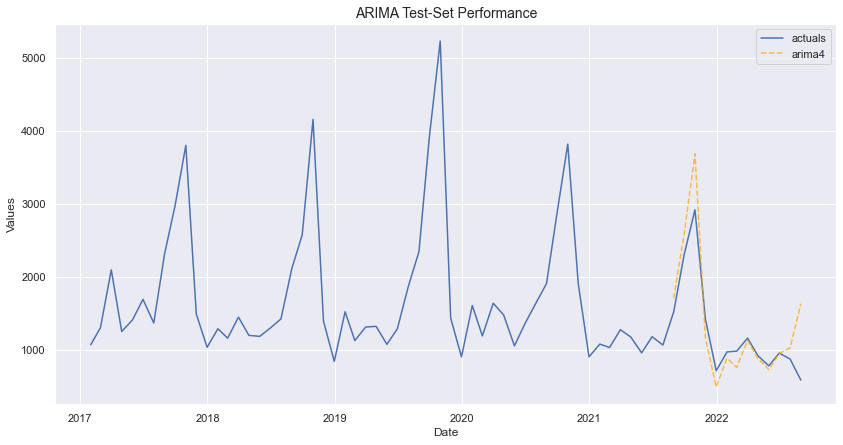

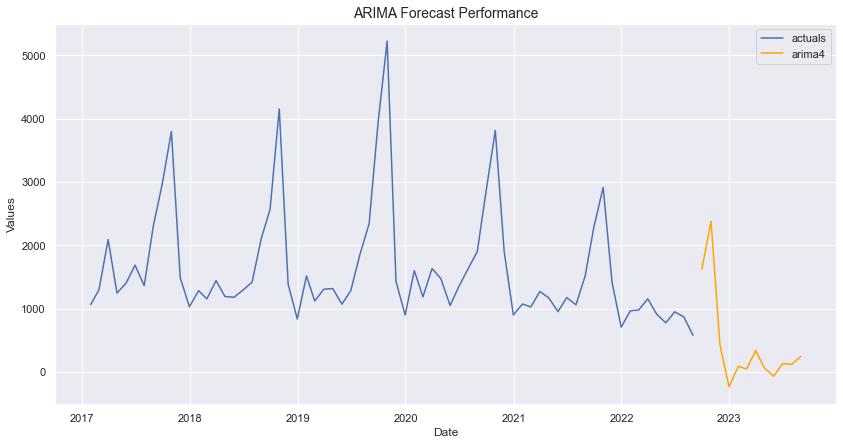

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   68
Model:             ARIMA(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -408.452
Date:                            Fri, 26 Aug 2022   AIC                            824.904
Time:                                    16:51:44   BIC                            832.933
Sample:                                         0   HQIC                           828.009
                                             - 68                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2737      0.188     -1.454      0.146      -0.643       0.095
ar.S.L12       0.3900      0.330      1.182      0.237      -0.257       1.037
ma.S.L12      -0.9902     10.486     -0.094      0.925     -21.541      19.561
sigma2      1.333e+05   1.36e+06      0.098      0.922   -2.53e+06     2.8e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                12.44
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.46
Prob(H) (two-sided):                  0.54   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [215]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=False,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=False,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

In [216]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [217]:
results["test_set_predictions"]
results["all_fcsts"]

,DATE,actual,arima4,arima2,arima3,arima1
55,2021-08-31,1517.0,1702.625656,1864.583179,1889.436807,1711.981871
56,2021-09-30,2300.0,2582.738084,2511.477406,3386.024467,1711.981871
57,2021-10-31,2915.0,3682.114872,3633.539862,4377.117595,1711.981871
58,2021-11-30,1417.0,1161.872889,1299.856642,1718.021872,1711.981871
59,2021-12-31,710.0,487.171588,655.024484,895.707528,1711.981871
60,2022-01-31,968.0,879.611172,972.754895,1298.928629,1711.981871
61,2022-02-28,979.0,756.989674,883.125150,1094.670314,1711.981871
62,2022-03-31,1157.0,1125.841442,1230.653855,1424.927616,1711.981871
63,2022-04-30,914.0,874.646439,942.788336,1298.279566,1711.981871
64,2022-05-31,777.0,725.686055,904.774353,995.411103,1711.981871


In [218]:
results["all_fcsts"]

,DATE,arima1,arima2,arima3,arima4
0,2022-09-30,1620.819437,1932.067910,1889.421139,1625.693075
1,2022-10-31,1620.819437,2981.945128,2733.757837,2382.789529
2,2022-11-30,1620.819437,791.024890,1294.865269,430.849719
3,2022-12-31,1620.819437,236.550741,619.085756,-235.628436
4,2023-01-31,1620.819437,619.801875,909.955076,90.661312
5,2023-02-28,1620.819437,525.169692,940.730385,48.910194
6,2023-03-31,1620.819437,854.534913,1144.475346,338.270787
7,2023-04-30,1620.819437,549.847584,931.090655,62.277341
8,2023-05-31,1620.819437,428.037525,790.075445,-64.500533
9,2023-06-30,1620.819437,631.389797,975.325472,133.178434
